<a href="https://colab.research.google.com/github/Neu-Utkarsh/Binary-Digit-Classification/blob/main/Multi-class%20Classifiaction/rock_paper_scissors_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Imports and Setup


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import random
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models



## 2. Download and Extract Dataset


In [2]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
zip_path = tf.keras.utils.get_file('rps.zip', origin=url, extract=False)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

200682221/200682221 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 3. Dataset Setup and Exploration


In [3]:
BASE_DIR = './rps'
rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

In [4]:
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

In [5]:
print(f'Total Rock Images: {len(rock_files)}')
print(f'Total Paper Images: {len(paper_files)}')
print(f'Total Scissors Images: {len(scissors_files)}')

Total Rock Images: 840
Total Paper Images: 840
Total Scissors Images: 840


## 4. Sample Visualization


In [6]:
sample_paths = [os.path.join(rock_dir, fname) for fname in random.sample(rock_files, 1)] + \
               [os.path.join(paper_dir, fname) for fname in random.sample(paper_files, 1)] + \
               [os.path.join(scissors_dir, fname) for fname in random.sample(scissors_files, 1)]

In [7]:
import matplotlib.image as mpimg

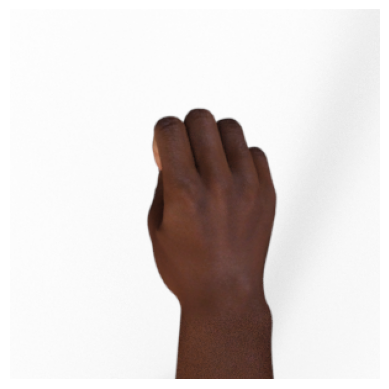

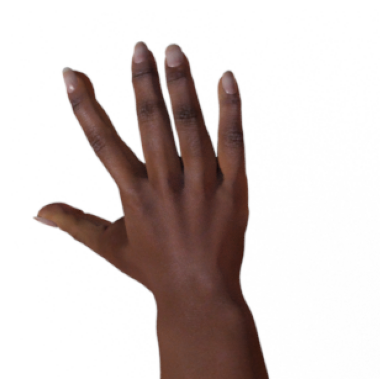

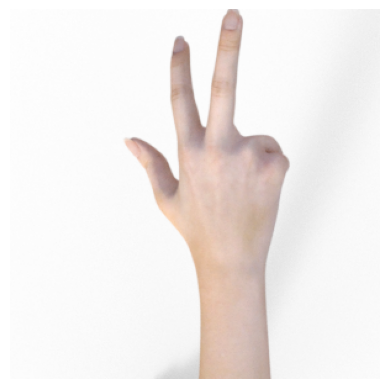

In [8]:
for img_path in sample_paths:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## 5. Train/Validation Dataset Creation


# Not recommended method

**Was not able to download the test dataset so instead splitted the data in validaton manually from the training data itself**


In [9]:
validation_split = 0.2
seed = 123

In [10]:
train_dataset = image_dataset_from_directory(
    BASE_DIR,
    validation_split=validation_split,
    subset='training',
    seed=seed,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

Found 2520 files belonging to 3 classes.
Using 2016 files for training.


In [11]:
validation_dataset = image_dataset_from_directory(
    BASE_DIR,
    validation_split=validation_split,
    subset='validation',
    seed=seed,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

Found 2520 files belonging to 3 classes.
Using 504 files for validation.


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_dataset_final = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset_final = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## 6. CNN Model Definition


In [14]:
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Compile and Train Model


In [23]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [24]:
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
# Train the model
history = model_with_aug.fit(
    train_dataset_final,
    epochs=25,
    validation_data = validation_dataset_final,
    verbose = 1
)

Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.3714 - loss: 2.4876 - val_accuracy: 0.6528 - val_loss: 0.8138
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4814 - loss: 1.0064 - val_accuracy: 0.6528 - val_loss: 0.5923
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5681 - loss: 0.9075 - val_accuracy: 0.9802 - val_loss: 0.1438
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5984 - loss: 0.8154 - val_accuracy: 0.9821 - val_loss: 0.1056
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6761 - loss: 0.7440 - val_accuracy: 0.9028 - val_loss: 0.2552
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7039 - loss: 0.6754 - val_accuracy: 0.9960 - val_loss: 0.0369
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7525 - loss: 0.5936 - val_accuracy: 0.8929 - val_loss: 0.1892
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7736 - loss: 0.5308 - val_accuracy: 0.9683 - v

## 8. Accuracy and Loss Plot


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

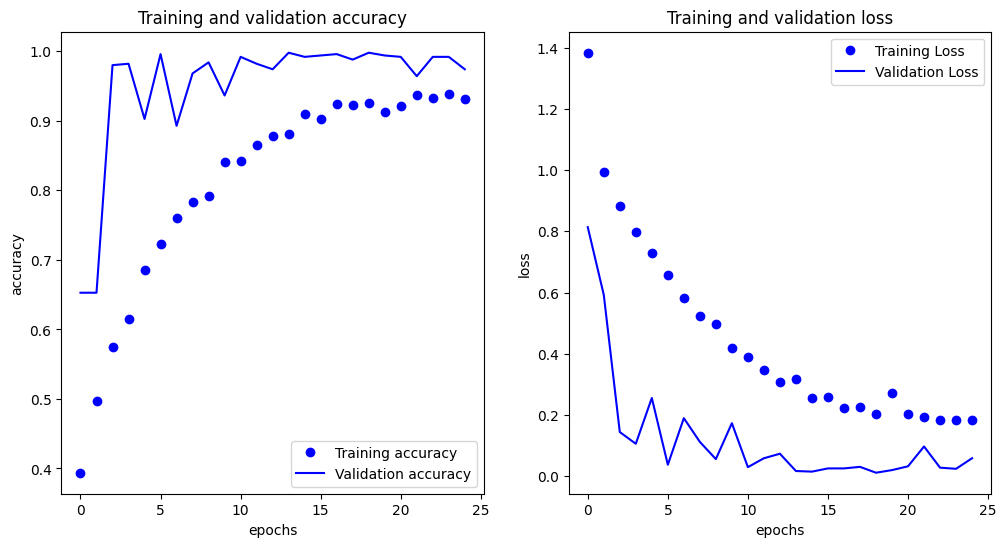

In [26]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

# **Testing**
For further testing we can download dataset from Lawrence Moroney kaggle or from his Github repo and use widgets to upload data to Colab and check for appropriate Classification results....